##### Probably nans in the areas of extremely high values? check tr.data.max()???

In [2]:
import obspy
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

In [3]:
in_dir = '../../data/banner/infrasound/out/'

In [9]:
dec[0][-2:]

'02'

In [16]:
l = os.listdir(in_dir)
r = []
for i in l:
    j = i[5:11]
    if j not in r:
        r.append(j)
r.sort()
dec = [i for i in r if i[2:4] == '12']
jan = [i for i in r if i[2:4] == '01']
pre_snow =[i for i in dec if int(i[-2:]) < 10]
post_snow =[i for i in dec if int(i[-2:]) > 12]

20 - 30: 100%|██████████| 7/7 [00:26<00:00,  3.85s/day]


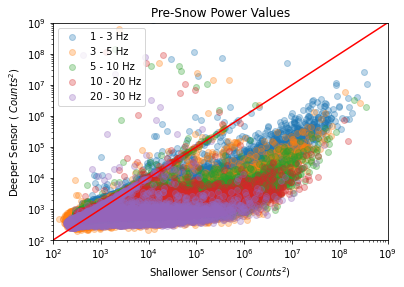

In [14]:
filter_freq = [(1,3),(3,5),(5,10),(10,20),(20,30)]
#filter_freq = [(1,3),(20,30)]
# a = 0
fig, ax = plt.subplots()
for freqs in filter_freq:
    full = obspy.Stream()
    for d in tqdm(pre_snow,  desc= f"{freqs[0]} - {freqs[1]}", unit="day"):
        # a += 1
        # if a == 3 or a ==4:
            for f in glob(os.path.join(in_dir, f'c0be4{d}*'), recursive= True):
                tr = obspy.read(os.path.join(f))[0]
                tr.detrend("linear")
                #st.taper(max_percentage=0.05, type="hann")
                tr.filter(type = 'bandpass', freqmin = freqs[0], freqmax = freqs[1])
                new_tr = obspy.Trace(data = pd.Series(tr.data**2).rolling(window=10).mean().values, header = tr.stats)
                new_tr.decimate(factor = 10, no_filter = True)
                full.append(new_tr)
    full = full.merge(method = 0)
    sr = full[0].stats['sampling_rate']
    tr_top = pd.Series(full.select(channel = 'p2').pop().data).rolling(window = int(10*sr)).mean()
    tr_bottom = pd.Series(full.select(channel = 'p0').pop().data).rolling(window = int(10*sr)).mean()
    tr_top = tr_top.iloc[::int(10*sr)]
    tr_bottom = tr_bottom.iloc[::int(10*sr)]
    ax.scatter(tr_top, tr_bottom, label = f"{freqs[0]} - {freqs[1]} Hz", alpha = 0.3)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Deeper Sensor ($~Counts^{2}$)')
plt.xlabel('Shallower Sensor ($~Counts^{2}$)')
plt.ylim(1e2,1e9)
plt.xlim(1e2,1e9)
ax.legend(loc = 'upper left')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.title('Pre-Snow Power Values')
plt.show()

20 - 30: 100%|██████████| 18/18 [01:21<00:00,  4.50s/day]


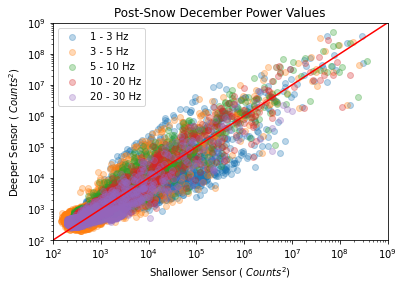

In [17]:
filter_freq = [(1,3),(3,5),(5,10),(10,20),(20,30)]
#filter_freq = [(1,3),(20,30)]
# a = 0
fig, ax = plt.subplots()
for freqs in filter_freq:
    full = obspy.Stream()
    for d in tqdm(post_snow,  desc= f"{freqs[0]} - {freqs[1]}", unit="day"):
        # a += 1
        # if a == 3 or a ==4:
            for f in glob(os.path.join(in_dir, f'c0be4{d}*'), recursive= True):
                tr = obspy.read(os.path.join(f))[0]
                tr.detrend("linear")
                #st.taper(max_percentage=0.05, type="hann")
                tr.filter(type = 'bandpass', freqmin = freqs[0], freqmax = freqs[1])
                new_tr = obspy.Trace(data = pd.Series(tr.data**2).rolling(window=10).mean().values, header = tr.stats)
                new_tr.decimate(factor = 10, no_filter = True)
                full.append(new_tr)
    full = full.merge(method = 0)
    sr = full[0].stats['sampling_rate']
    tr_top = pd.Series(full.select(channel = 'p2').pop().data).rolling(window = int(10*sr)).mean()
    tr_bottom = pd.Series(full.select(channel = 'p0').pop().data).rolling(window = int(10*sr)).mean()
    tr_top = tr_top.iloc[::int(10*sr)]
    tr_bottom = tr_bottom.iloc[::int(10*sr)]
    ax.scatter(tr_top, tr_bottom, label = f"{freqs[0]} - {freqs[1]} Hz", alpha = 0.3)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Deeper Sensor ($~Counts^{2}$)')
plt.xlabel('Shallower Sensor ($~Counts^{2}$)')
plt.ylim(1e2,1e9)
plt.xlim(1e2,1e9)
ax.legend(loc = 'upper left')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.title('Post-Snow December Power Values')
plt.show()

In [ ]:
filter_freq = [(1,3),(3,5),(5,10),(10,20),(20,30)]
#filter_freq = [(1,3),(20,30)]
# a = 0
fig, ax = plt.subplots()
for freqs in filter_freq:
    full = obspy.Stream()
    for d in tqdm(jan,  desc= f"{freqs[0]} - {freqs[1]}", unit="day"):
        # a += 1
        # if a == 3 or a ==4:
            for f in glob(os.path.join(in_dir, f'c0be4{d}*'), recursive= True):
                tr = obspy.read(os.path.join(f))[0]
                tr.detrend("linear")
                #st.taper(max_percentage=0.05, type="hann")
                tr.filter(type = 'bandpass', freqmin = freqs[0], freqmax = freqs[1])
                new_tr = obspy.Trace(data = pd.Series(tr.data**2).rolling(window=10).mean().values, header = tr.stats)
                new_tr.decimate(factor = 10, no_filter = True)
                full.append(new_tr)
    full = full.merge(method = 0)
    sr = full[0].stats['sampling_rate']
    tr_top = pd.Series(full.select(channel = 'p2').pop().data).rolling(window = int(10*sr)).mean()
    tr_bottom = pd.Series(full.select(channel = 'p0').pop().data).rolling(window = int(10*sr)).mean()
    tr_top = tr_top.iloc[::int(10*sr)]
    tr_bottom = tr_bottom.iloc[::int(10*sr)]
    ax.scatter(tr_top, tr_bottom, label = f"{freqs[0]} - {freqs[1]} Hz", alpha = 0.3)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Deeper Sensor ($~Counts^{2}$)')
plt.xlabel('Shallower Sensor ($~Counts^{2}$)')
plt.ylim(1e2,1e9)
plt.xlim(1e2,1e9)
ax.legend(loc = 'upper left')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.title('January Power Values')
plt.show()

In [8]:
tr = full_test[0]
start = pd.to_datetime(tr.__dict__['stats']['starttime'].datetime)
end = pd.to_datetime(tr.__dict__['stats']['endtime'].datetime)
l = len(tr)
t = pd.to_datetime(np.linspace(start.value, end.value, l))

In [9]:
sr = tr.stats['sampling_rate']

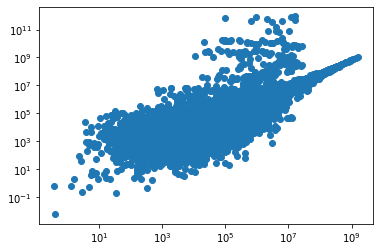

In [14]:
tr_top = pd.Series(full_test.select(channel = 'p2').pop().data).rolling(window = int(10*sr)).mean()
tr_bottom = pd.Series(full_test.select(channel = 'p0').pop().data).rolling(window = int(10*sr)).mean()
tr_top = tr_top.iloc[::int(10*sr)]
tr_bottom = tr_bottom.iloc[::int(10*sr)]
plt.scatter(tr_top, tr_bottom, label = )
plt.yscale('log')
plt.xscale('log')

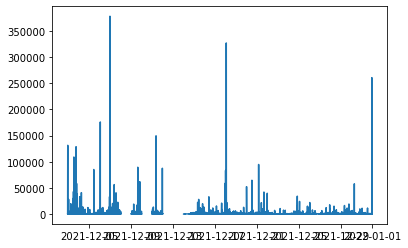

In [65]:
tr_top = full_test.select(channel = 'p2').pop()
tr_bottom = full_test.select(channel = 'p1').pop()
ratios = pd.Series(tr_top.data/tr_bottom.data, index= t)
ratio_smooth = ratios.rolling(window = int(10*sr)).mean()
ratio_sub = ratio_smooth.iloc[::int(10*sr)]
#sub_ratios.plot()
plt.plot(ratio_sub)
#plt.yscale('log')
# plt.yscale('log')